# Photo denoising

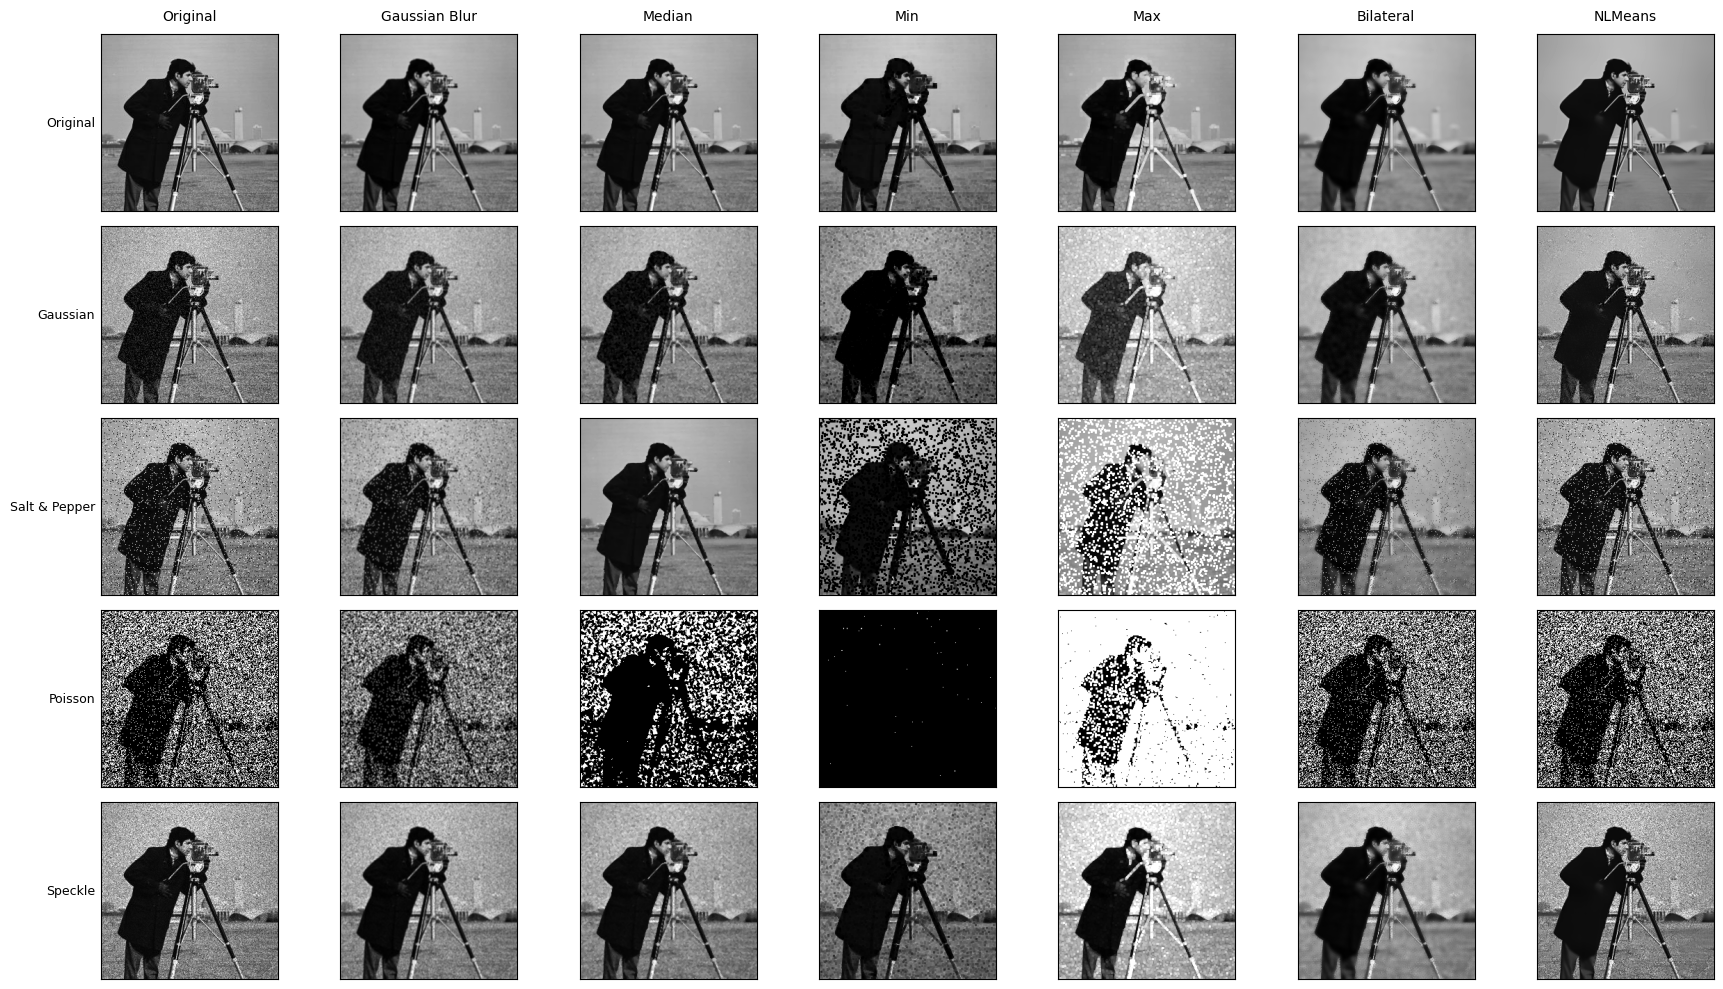

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import minimum_filter, maximum_filter

# Load the Cameraman image (JPG format)
img = cv2.imread('cameraman.jpg', cv2.IMREAD_GRAYSCALE)  # Load as grayscale
if img is None:
    # Fallback: Use a placeholder if image not found
    print("Error: 'cameraman.jpg' not found. Using random noise as placeholder.")
    img = np.random.randint(0, 256, (256, 256), dtype=np.uint8)

# --- Add Different Noises ---
def add_gaussian_noise(image, mean=0, sigma=25):
    noise = np.random.normal(mean, sigma, image.shape).astype('int16')
    noisy = np.clip(image.astype('int16') + noise, 0, 255).astype('uint8')
    return noisy

def add_salt_pepper_noise(image, salt_prob=0.05, pepper_prob=0.05):
    noisy = image.copy()
    salt_mask = np.random.rand(*image.shape) < salt_prob
    pepper_mask = np.random.rand(*image.shape) < pepper_prob
    noisy[salt_mask] = 255
    noisy[pepper_mask] = 0
    return noisy

def add_poisson_noise(image):
    noisy = np.random.poisson(image.astype(float) / 255.0) * 255
    return np.clip(noisy, 0, 255).astype('uint8')

def add_speckle_noise(image, strength=0.2):
    speckle = np.random.randn(*image.shape) * strength
    noisy = image * (1 + speckle)
    return np.clip(noisy, 0, 255).astype('uint8')

# Generate noisy versions
noises = {
    "Original": img,
    "Gaussian": add_gaussian_noise(img),
    "Salt & Pepper": add_salt_pepper_noise(img),
    "Poisson": add_poisson_noise(img),
    "Speckle": add_speckle_noise(img)
}

# --- Define Denoising Filters ---
def gaussian_blur(img, ksize=(3, 3)):
    return cv2.GaussianBlur(img, ksize, 0)

def median_blur(img, ksize=3):
    return cv2.medianBlur(img, ksize)

def min_filter(img, size=3):
    return minimum_filter(img, size=size)

def max_filter(img, size=3):
    return maximum_filter(img, size=size)

def bilateral_filter(img, d=9, sigma_color=75, sigma_space=75):
    return cv2.bilateralFilter(img, d, sigma_color, sigma_space)

def nlmeans_denoise(img, h=15, template_size=7, search_size=21):
    return cv2.fastNlMeansDenoising(img, None, h=h, templateWindowSize=template_size, searchWindowSize=search_size)

filters = {
    "Original": lambda x: x,
    "Gaussian Blur": gaussian_blur,
    "Median": median_blur,
    "Min": min_filter,
    "Max": max_filter,
    "Bilateral": bilateral_filter,
    "NLMeans": nlmeans_denoise
}

# --- Plotting ---
fig, axes = plt.subplots(
    nrows=len(noises),
    ncols=len(filters),
    figsize=(18, 10),  # Wider figure to accommodate more columns
    tight_layout=True
)

# Label rows (noise types)
for i, noise_name in enumerate(noises.keys()):
    axes[i, 0].set_ylabel(noise_name, rotation=0, ha='right', va='center', fontsize=9)

# Label columns (filters)
for j, filter_name in enumerate(filters.keys()):
    axes[0, j].set_title(filter_name, fontsize=10, pad=10)

# Populate the grid
for i, (noise_name, noisy_img) in enumerate(noises.items()):
    for j, (filter_name, filter_func) in enumerate(filters.items()):
        if i == 0 and j == 0:
            axes[i, j].imshow(img, cmap='gray')
        else:
            denoised = filter_func(noisy_img)
            axes[i, j].imshow(denoised, cmap='gray')
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

plt.show()